### Assignment 2 ###
Using the 2013_NYC_CD_MedianIncome_Recycle.xlsx file, calculate the correlation between the recycling rate and the median income. Discuss your findings in your PR.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import statistics
from decimal import Decimal

In [2]:
df = pd.read_excel("2013_NYC_CD_MedianIncome_Recycle.xlsx")

In [3]:
df.head()

,CD_Name,MdHHIncE,RecycleRate
0,"Battery Park City, Greenwich Village & Soho",119596,0.286771
1,"Battery Park City, Greenwich Village & Soho",119596,0.264074
2,Chinatown & Lower East Side,40919,0.156485
3,"Chelsea, Clinton & Midtown Business Distric",92583,0.235125
4,"Chelsea, Clinton & Midtown Business Distric",92583,0.246725


In [4]:
df['MdHHIncE'].describe()

count        59.000000
mean      53895.932203
std       24371.741796
min       21318.000000
25%       37950.000000
50%       48252.000000
75%       61967.000000
max      119596.000000
Name: MdHHIncE, dtype: float64

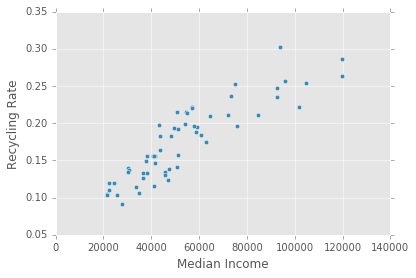

In [5]:
df.plot(kind='scatter', x='MdHHIncE', y='RecycleRate')
plt.xlabel('Median Income')
plt.ylabel('Recycling Rate')

In [6]:
df.corr(method='pearson', min_periods=1)

,MdHHIncE,RecycleRate
MdHHIncE,1.000000,0.884783
RecycleRate,0.884783,1.000000


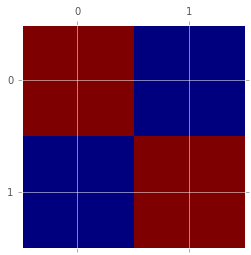

In [7]:

plt.matshow(df.corr())


In [8]:
df['MdHHIncE'].median()

48252.0

In [9]:
df['MdHHIncE'].mode()

0     21318
1     22343
2     51251
3     92583
4    119596
dtype: int64

In [10]:
df['MdHHIncE'].quantile(q=0.25) #1st Quartile

37950.0

In [11]:
df['MdHHIncE'].quantile(q=0.5) #2nd Quartile (Median)

48252.0

In [12]:
df['MdHHIncE'].quantile(q=0.75) #3rd Quartile

61967.0

In [13]:
IQR = df['MdHHIncE'].quantile(q=0.75) - df['MdHHIncE'].quantile(q=0.25)
IQR

24017.0

In [14]:
1.5 * IQR

36025.5

In [15]:
lower_outliers = (df['MdHHIncE'].quantile(q=0.25))- (IQR * 1.5)

In [16]:
upper_outliers = (df['MdHHIncE'].quantile(q=0.75)) + (IQR * 1.5)

In [21]:
lower_outliers

1924.5

In [18]:
upper_outliers


97992.5

In [19]:
df[(df['MdHHIncE'] > upper_outliers)]

,CD_Name,MdHHIncE,RecycleRate
0,"Battery Park City, Greenwich Village & Soho",119596,0.286771
1,"Battery Park City, Greenwich Village & Soho",119596,0.264074
5,"Murray Hill, Gramercy & Stuyvesant Town",101769,0.222046
7,Upper East Side,104602,0.253719


In [22]:
df[(df['MdHHIncE'] < lower_outliers)]

,CD_Name,MdHHIncE,RecycleRate
